# ECMWF Storm Data Processing

This notebook demos how to use the functions in `src/ocha_lens/datasources/ecmwf_storm.py`

In [1]:
import geopandas as gpd
from shapely.geometry import LineString

import ocha_lens as lens

Access the `cxml` datasets saved to Azure blob and store as a dataframe. By default we'll get yesterday's data.

In [2]:
df_raw = lens.ecmwf_storm.load_hindcasts()

Processing for 2025-07-20 00:00:00...


Process this dataframe into the `storms` and `forecast_track` standards

In [3]:
df_storms = lens.ecmwf_storm.get_storms(df_raw)

In [4]:
gdf_tracks = lens.ecmwf_storm.get_tracks(df_raw)

A very basic plot of the forecast tracks that we've defined as a storm.

<Axes: >

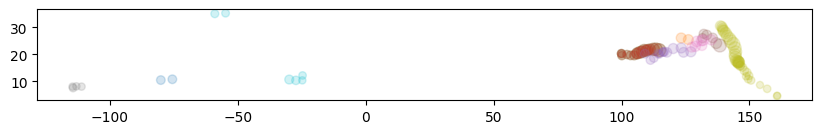

In [10]:
gdf_tracks.plot(
    column="forecast_id",
    markersize=gdf_tracks["wind_speed"] * 3,
    legend=False,
    figsize=(10, 8),
    alpha=0.2,
)

And do a simple transformation of all points into tracks. We can see the IDs are unique as we'd expect here...

<Axes: >

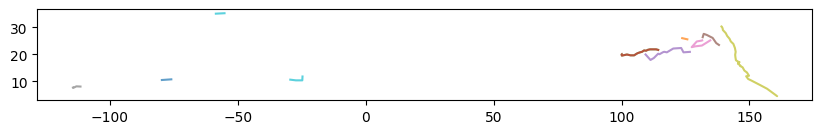

In [12]:
tracks = (
    gdf_tracks.sort_values("valid_time")
    .groupby(["forecast_id"])
    .apply(
        lambda x: LineString([(pt.x, pt.y) for pt in x.geometry]),
        include_groups=False,
    )
    .reset_index(name="geometry")
)


tracks_gdf = gpd.GeoDataFrame(tracks, crs=gdf_tracks.crs)
track_attrs = gdf_tracks.groupby("forecast_id").first().reset_index()
tracks_gdf = tracks_gdf.merge(
    track_attrs[["forecast_id", "basin"]], on="forecast_id"
)

tracks_gdf.plot(
    column="forecast_id",
    legend=False,
    alpha=0.7,
    figsize=(10, 10),
)